# Notebook 23: The Fry method

The Fry method is a center-to-center distance technique to determine the finite strain ellipse from grains in a section. It involves marking the centers of the grains on an overlay, and then translating the overlay so that a reference mark on a grain center is moved to another center. After that, the grains' centers are marked again. This process is repeated until the reference mark is placed on all grains' centers. This is a rather tedious process that requires lots of patience and perseverance.

Fortunately, there are computer programs that facilitate this method. [EllipseFit](https://www.frederickvollmer.com/ellipsefit/index.html) by Frederick Vollmer is one of them. In this notebook, we'll look at how to automate part of the method, namely the translation of the reference mark to each grain center, and the marking of the other centers.

## Application

The image below is a thin section (4 x 2.5 cm) of a Silurian [oolitic limestone](https://en.wikipedia.org/wiki/Oolite) from Central Wales (Ramsay and Huber, 1983).

<img src="../figures/ooids.jpg" alt="ooids" width="700" style="display: block; margin: 0 auto"/><br><br>

The centers of the ooids (red points) were digitized in the program EllipseFit, and their coordinates were saved in the file [ooids.txt](../data/ooids.txt).

Let's plot the ooids' centers:

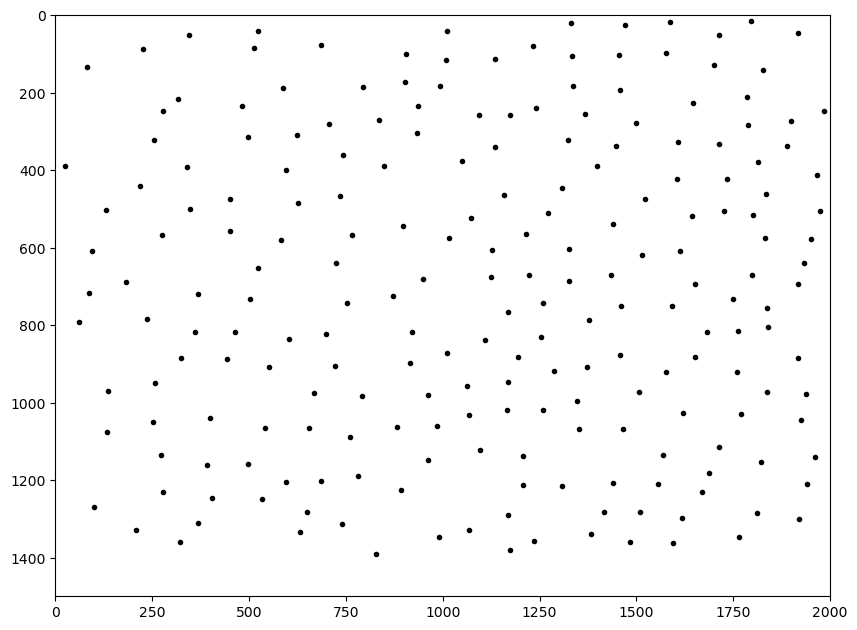

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt

# Read ooids centers
oo_c = np.loadtxt("../data/ooids.txt")

# Make figure
fig, ax = plt.subplots(figsize=(10,10))

# plot ooids centers
plt.plot(oo_c[:,1], oo_c[:,2], "k.")

ax.axis('scaled')
ax.set_xlim([0, 2000]) # x limits of image
# In image y increases downwards
# so we need to invert the y axis
ax.set_ylim([1500, 0]) # y limits of image

plt.show()

Now, let's simulate the process of placing the reference mark at an ooid center, and marking the other ooids' centers. The simple code below will do it and saves us precious hours. The algorithm works as following:

For each ooid:

1. Place the reference mark at the ooid center with coordinates xc, yc
2. The new coordinates of the other ooids' centers are: coordinates of the reference mark - input coordinates of the ooids' centers.
3. Plot the other ooids' centers using the new coordinates. 

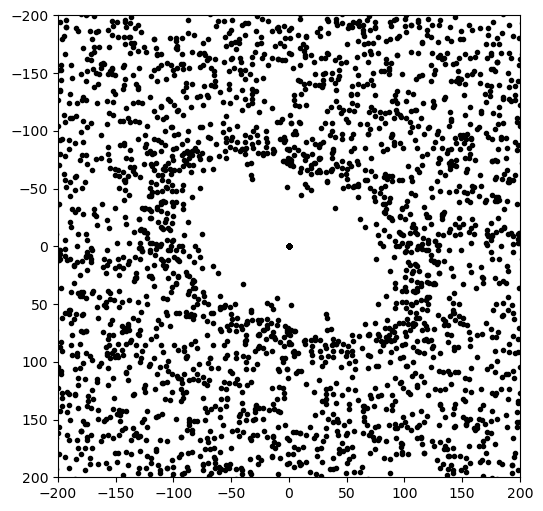

In [2]:
# Make figure
fig, ax = plt.subplots(figsize=(6,6))

# Fry method
for i in range(oo_c.shape[0]): # for each ooid
    x_c = oo_c[i,1] # x of current ooid center
    y_c = oo_c[i,2] # y of current ooid center
    oo_ac_x = x_c - oo_c[:,1] # x of ooids digitized a current ooid center
    oo_ac_y = y_c - oo_c[:,2] # y of ooids digitized a current ooid center
    ax.plot(oo_ac_x, oo_ac_y, "k.")

ax.axis("scaled")
ax.set_xlim([-200, 200]) # x limits of plot
# In image, y increases downwards
ax.set_ylim([200, -200]); # y limits of plot

We get a void in the center that indicates the strain ellipse for this deformation. The next step is to fit an ellipse to the void, something we can probably automate in Python. The marking of the ooids' centers can also be automated using ML tools. So in principle, one can automate the entire method, which is useful if one needs to analize many sections.